# Problem Statement: Breast Cancer Prediction

## Background
Breast cancer is one of the most common cancers affecting women worldwide. Early detection and accurate diagnosis are crucial for effective treatment and improved survival rates. Traditional diagnostic methods, such as mammography, ultrasound, and biopsy, can be time-consuming, invasive, and sometimes lead to false positives or negatives. With the advent of machine learning and data analytics, there is a significant opportunity to improve breast cancer prediction using computational methods. These methods can analyze large datasets to identify patterns and indicators that may not be evident through conventional techniques.

## Objective
The objective of this project is to develop a robust and accurate machine learning model to predict the presence of breast cancer based on diagnostic data. The model should be able to classify whether a breast tumor is malignant or benign using features derived from medical imaging and clinical data.

## Scope
1. Data Collection:

- Obtain a comprehensive dataset, such as the Breast Cancer Wisconsin (Diagnostic) Data Set, which includes various features derived from breast cancer diagnostics.
- Ensure the dataset includes labels indicating whether the tumors are malignant or benign.

2. Feature Engineering:

- Analyze and preprocess the data to handle missing values, normalize feature scales, and select relevant features.
- Consider features such as radius, texture, perimeter, area, smoothness, compactness, concavity, symmetry, and fractal dimension.

3. Model Development:

- Experiment with various machine learning algorithms, including but not limited to logistic regression, decision trees, random forests, support vector machines, and neural networks.

- Evaluate the models using appropriate metrics like accuracy, precision, recall, F1 score, and AUC-ROC curve.

4. Model Evaluation and Validation:

- Split the data into training and testing sets to validate the model's performance.
- Use cross-validation techniques to ensure the model's robustness and generalizability.

5. Interpretability and Deployment:

- Provide interpretability of the model to understand which features are most indicative of malignancy.
- Develop a user-friendly interface for healthcare professionals to use the model in a clinical setting.

## Challenges
- Ensuring data quality and dealing with imbalanced datasets where benign cases may significantly outnumber malignant cases.
- Balancing model complexity and interpretability to ensure the model is both accurate and understandable to medical practitioners.
- Addressing ethical and privacy concerns related to the use of patient data in model training and prediction.

## Expected Outcomes
- A validated and reliable machine learning model capable of predicting the likelihood of breast cancer.
- Insights into the most significant features contributing to the prediction of malignancy.
- A potential tool for aiding medical professionals in the early detection and diagnosis of breast cancer, ultimately contributing to better patient outcomes.

**By achieving these outcomes, this project aims to leverage machine learning to enhance the accuracy and efficiency of breast cancer diagnosis, thereby supporting timely and effective treatment decisions.**

In [ ]:
import warnings

warnings.filterwarnings('ignore')

## Import Libraries for Data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Loading Data

In [ ]:
data = pd.read_csv("./Data/data.csv")

In [ ]:
data.shape

(569, 33)

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [ ]:
data.isnull().sum().sum()

569

In [ ]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

*As we can see that the 'Unnamed: 32' column has all the null values, so we can drop this column*

In [ ]:
data = data.drop('Unnamed: 32', axis = 1)

In [ ]:
data['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [ ]:
data['diagnosis'].dtype

dtype('O')

In [ ]:
data.diagnosis = data.diagnosis.astype('category')

In [ ]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
X = data.drop(labels='diagnosis', axis=1)

Y = data['diagnosis']

In [ ]:
cols = X.columns

cols

Index(['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [ ]:
X.isnull().sum().sum()

0

## Normalization and Feature Scalling

In [ ]:
X.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df_norm = (X - X.mean()) / (X.max() - X.min())
df_norm = pd.concat([df_norm, Y], axis = 1)

In [ ]:
df_norm.shape

(569, 32)

In [ ]:
df_norm.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,-0.032403,0.182815,-0.301307,0.213053,0.146813,0.198968,0.531437,0.495081,0.487976,0.306758,...,-0.222474,0.385173,0.279792,0.196998,0.399079,0.351207,0.518192,0.335156,0.229268,M
1,-0.032403,0.304923,-0.051392,0.282848,0.284671,-0.104905,-0.078833,-0.004450,0.105621,0.000193,...,-0.060427,0.256680,0.264308,-0.056585,-0.065649,-0.024432,0.245339,-0.029717,0.033282,M
2,0.059177,0.263274,0.066295,0.262808,0.232497,0.119524,0.170416,0.254453,0.392549,0.129991,...,-0.003924,0.225304,0.203602,0.079452,0.165163,0.142341,0.441216,0.140399,0.023837,M
3,0.059229,-0.128132,0.036874,-0.099434,-0.114014,0.416536,0.550761,0.357546,0.279726,0.396657,...,0.021929,-0.041791,-0.076898,0.511335,0.593799,0.331239,0.491044,0.736693,0.584115,M
4,0.059241,0.291671,-0.167388,0.298051,0.272369,0.035567,0.087292,0.255859,0.275253,-0.001323,...,-0.240065,0.223810,0.170669,0.033226,-0.047797,0.102086,0.164583,-0.105806,-0.047001,M


## Data Visualization

<Axes: >

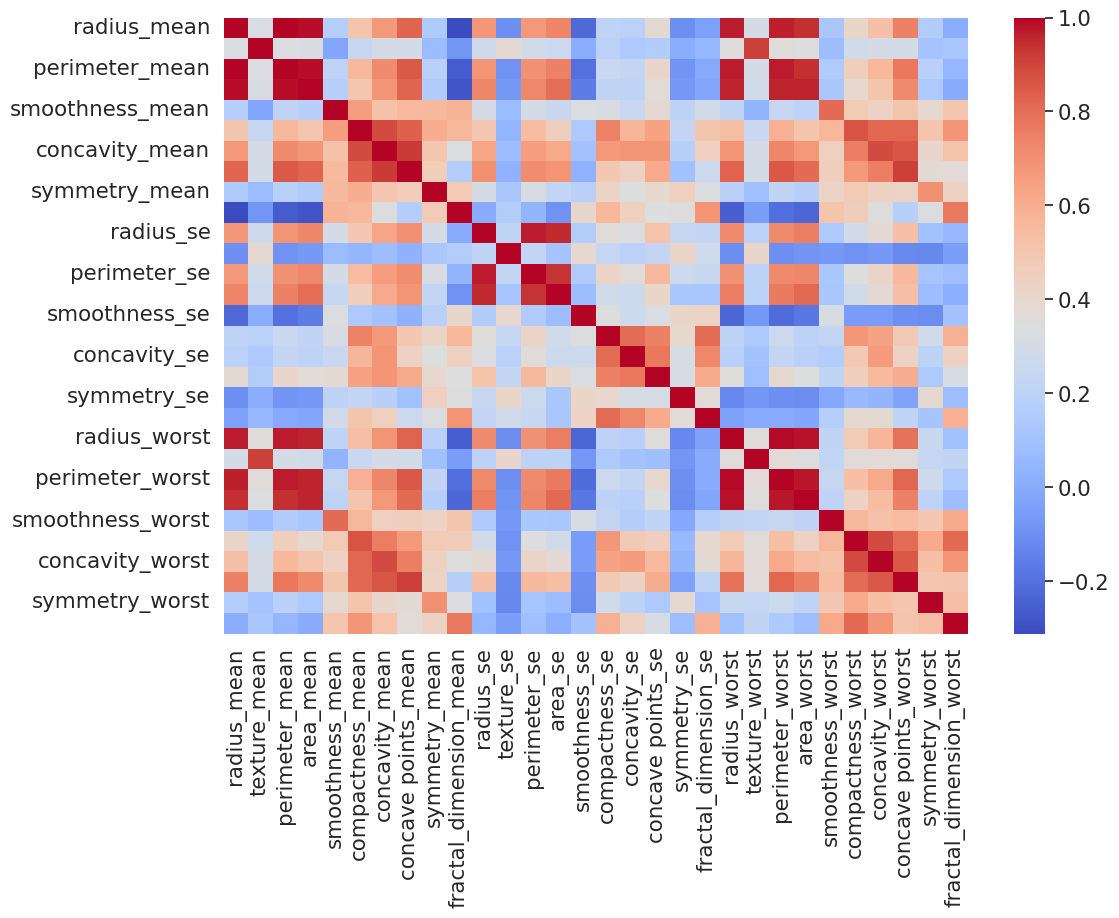

In [ ]:
# Explore the correlations
plt.rcParams['figure.figsize'] = (12,8)

sns.set(font_scale=1.4)

sns.heatmap(data.drop('diagnosis', axis=1).drop('id', axis=1).corr(), cmap='coolwarm')

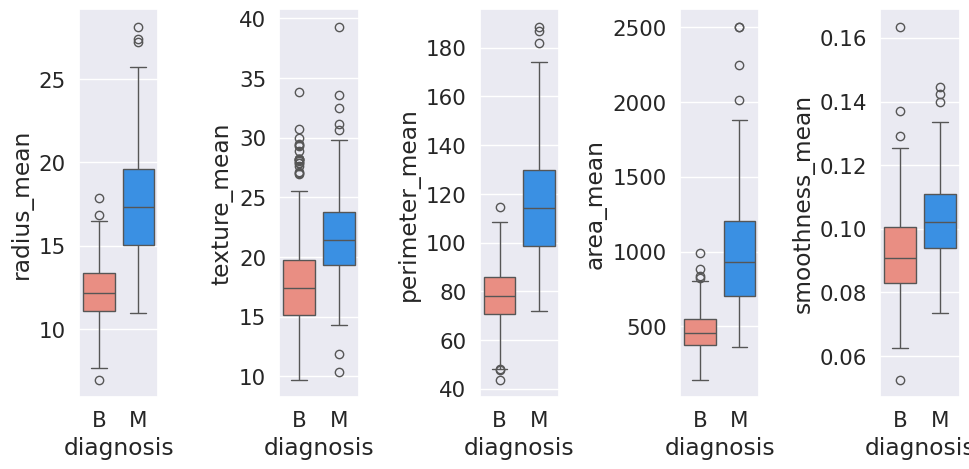

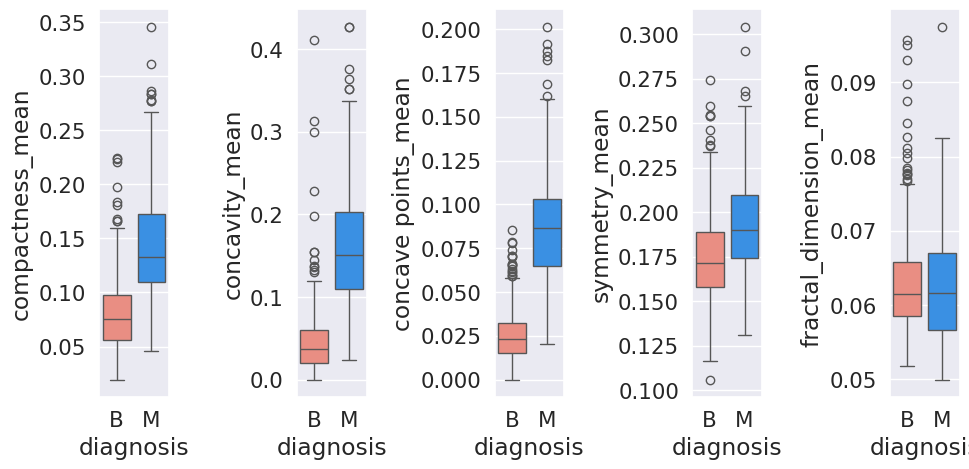

In [ ]:
plt.rcParams['figure.figsize'] = (10, 5)

# Define a custom color palette
palette = {'M': 'dodgerblue', 'B': 'salmon'}

# First set of box plots
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5)

sns.boxplot(x='diagnosis', y='radius_mean', data=data, ax=ax1, palette=palette)
sns.boxplot(x='diagnosis', y='texture_mean', data=data, ax=ax2, palette=palette)
sns.boxplot(x='diagnosis', y='perimeter_mean', data=data, ax=ax3, palette=palette)
sns.boxplot(x='diagnosis', y='area_mean', data=data, ax=ax4, palette=palette)
sns.boxplot(x='diagnosis', y='smoothness_mean', data=data, ax=ax5, palette=palette)

fig.tight_layout()

# Second set of box plots
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5)

sns.boxplot(x='diagnosis', y='compactness_mean', data=data, ax=ax1, palette=palette)
sns.boxplot(x='diagnosis', y='concavity_mean', data=data, ax=ax2, palette=palette)
sns.boxplot(x='diagnosis', y='concave points_mean', data=data, ax=ax3, palette=palette)
sns.boxplot(x='diagnosis', y='symmetry_mean', data=data, ax=ax4, palette=palette)
sns.boxplot(x='diagnosis', y='fractal_dimension_mean', data=data, ax=ax5, palette=palette)

fig.tight_layout()

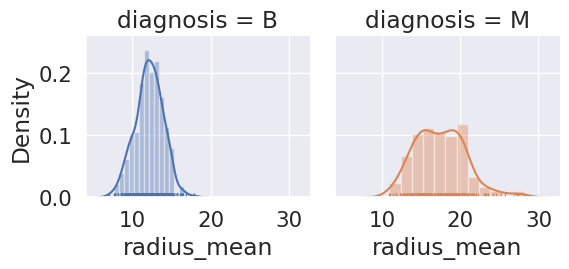

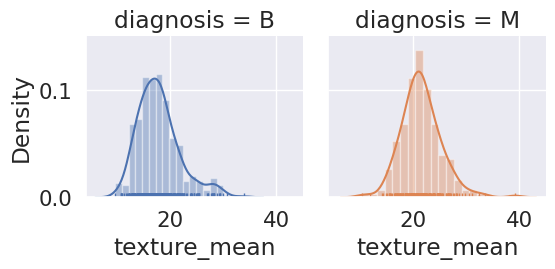

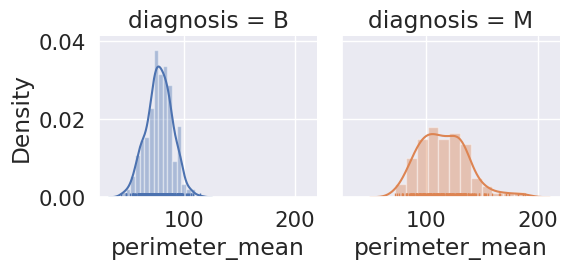

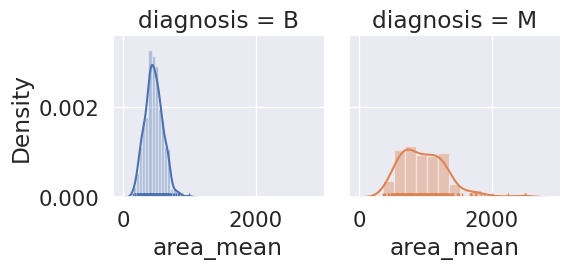

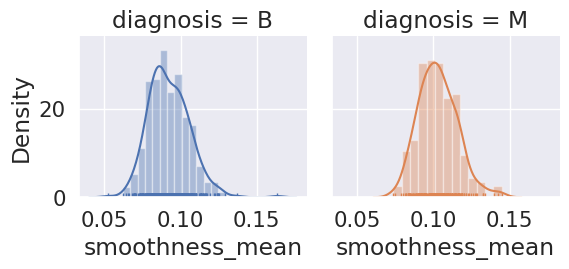

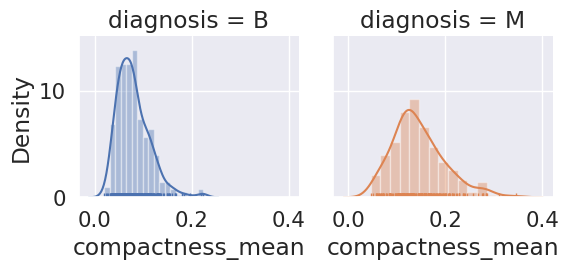

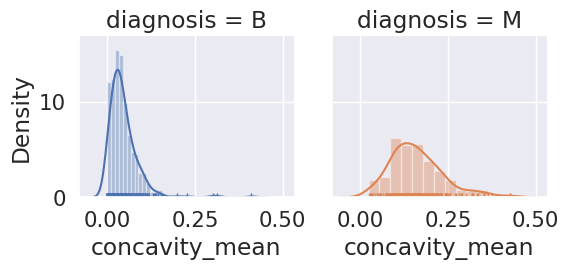

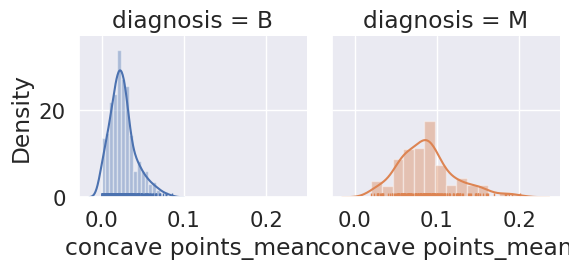

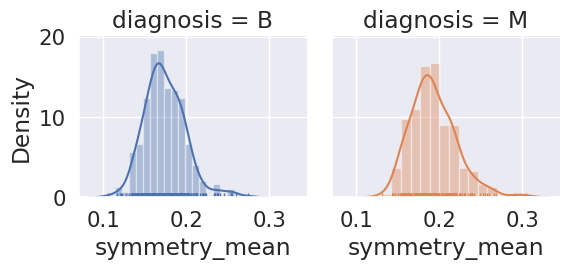

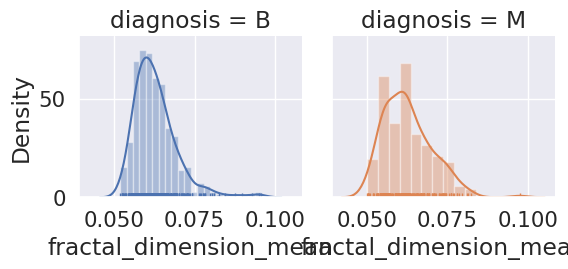

In [ ]:
# g = sns.FacetGrid(data, col='diagnosis', hue='diagnosis')
# g.map(sns.distplot, 'radius_mean', hist=False, rug=True)

# g = sns.FacetGrid(data, col='diagnosis', hue='diagnosis')
# g.map(sns.distplot, 'texture_mean', hist=True, rug=True)

# g = sns.FacetGrid(data, col='diagnosis', hue='diagnosis')
# g.map(sns.distplot, 'perimeter_mean', hist=True, rug=True)

# g = sns.FacetGrid(data, col='diagnosis', hue='diagnosis')
# g.map(sns.distplot, 'area_mean', hist=True, rug=True)

# g = sns.FacetGrid(data, col='diagnosis', hue='diagnosis')
# g.map(sns.distplot, 'smoothness_mean', hist=True, rug=True)

# g = sns.FacetGrid(data, col='diagnosis', hue='diagnosis')
# g.map(sns.distplot, 'compactness_mean', hist=True, rug=True)

# g = sns.FacetGrid(data, col='diagnosis', hue='diagnosis')
# g.map(sns.distplot, 'concavity_mean', hist=True, rug=True)

# g = sns.FacetGrid(data, col='diagnosis', hue='diagnosis')
# g.map(sns.distplot, 'concave points_mean', hist=True, rug=True)

# g = sns.FacetGrid(data, col='diagnosis', hue='diagnosis')
# g.map(sns.distplot, 'symmetry_mean', hist=True, rug=True)

# g = sns.FacetGrid(data, col='diagnosis', hue='diagnosis')
# g.map(sns.distplot, 'fractal_dimension_mean', hist=True, rug=True)

# List of variables to plot
variables = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
             'smoothness_mean', 'compactness_mean', 'concavity_mean',
             'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

for var in variables:
  g = sns.FacetGrid(data, col='diagnosis', hue='diagnosis')
  g.map(sns.distplot, var, hist=True, rug=True)

  plt.show()

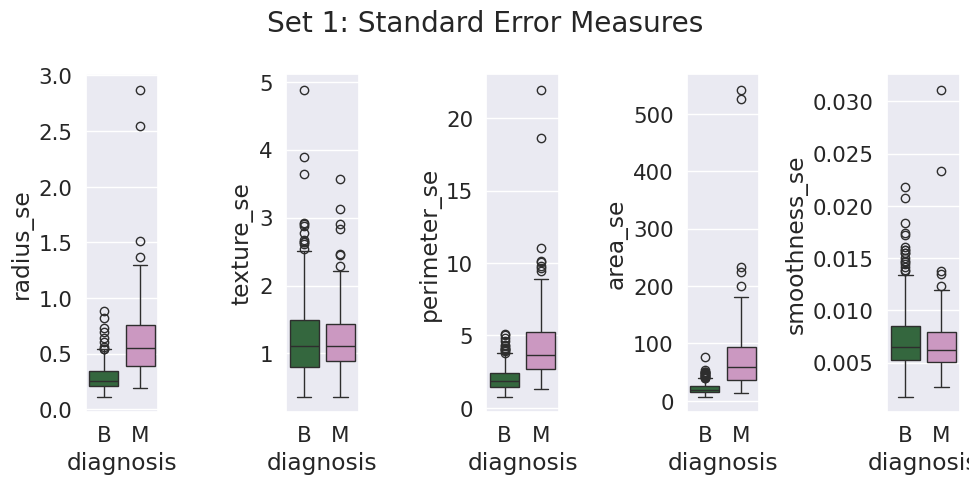

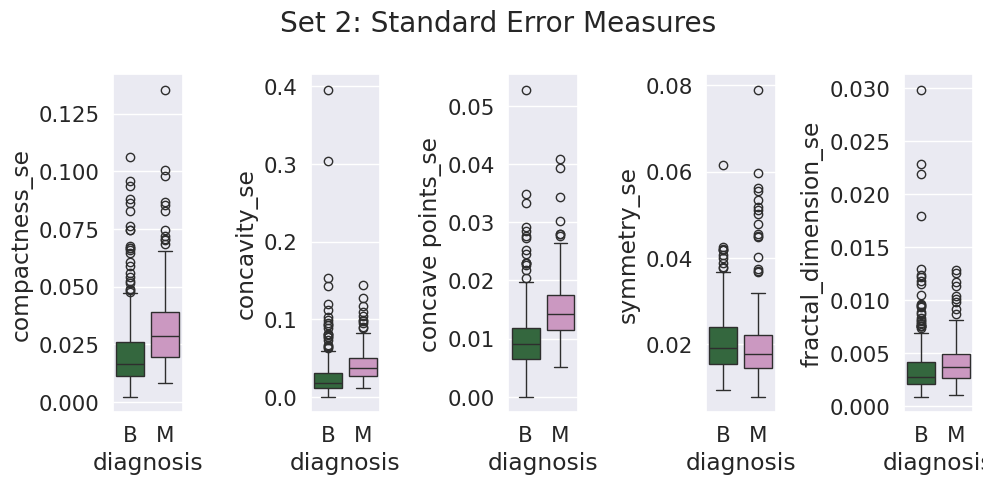

In [ ]:
plt.rcParams['figure.figsize']=(10,5)

# Define the list of valibales in two different sets to plot
variables_set1 = ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se']
variables_set2 = ['compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se']

# Define the Function to create the box-plot
def create_boxplots(variables, fig_title):

  fig, axes = plt.subplots(1, 5)

  for ax, var in zip(axes, variables):
    sns.boxplot(x='diagnosis', y=var, data=data, ax=ax, palette='cubehelix')

  fig.tight_layout()
  fig.suptitle(fig_title)
  plt.subplots_adjust(top=0.85) # Adjust the top of the subplots to make space for the title

# Plot the first set of variables
create_boxplots(variables_set1, "Set 1: Standard Error Measures")

# Plot the second set of variables
create_boxplots(variables_set2, "Set 2: Standard Error Measures")

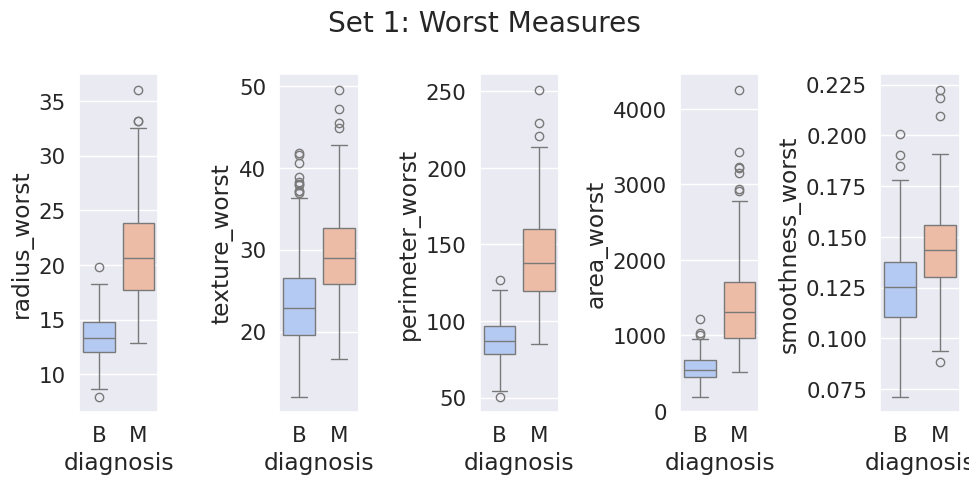

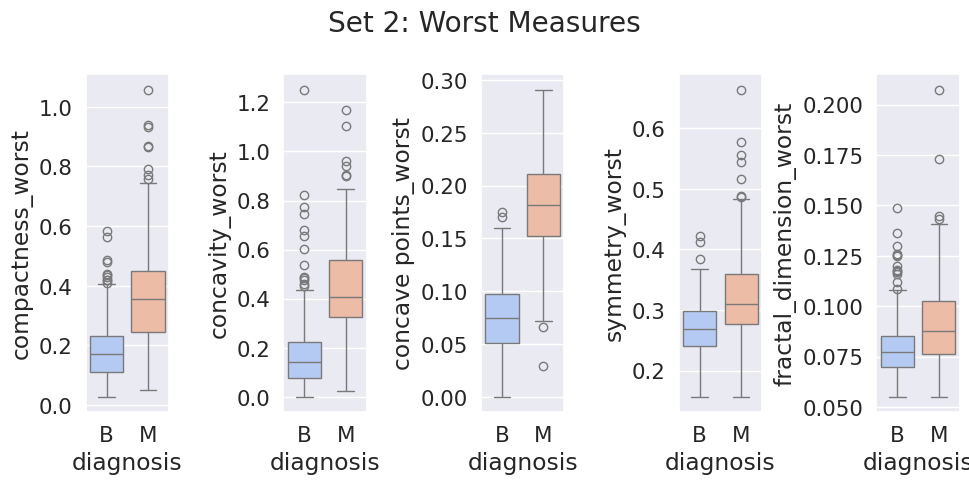

In [ ]:
plt.rcParams['figure.figsize']=(10,5)

# Define the list of valibales in two different sets to plot
# Define the lists of y-values
variables_set1 = ['radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst']
variables_set2 = ['compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

# Define the Function to create the box-plot
def create_boxplots(variables, fig_title):

  fig, axes = plt.subplots(1, 5)

  for ax, var in zip(axes, variables):
    sns.boxplot(x='diagnosis', y=var, data=data, ax=ax, palette='coolwarm')

  fig.tight_layout()
  fig.suptitle(fig_title)
  plt.subplots_adjust(top=0.85) # Adjust the top of the subplots to make space for the title

# Plot the first set of variables
create_boxplots(variables_set1, "Set 1: Worst Measures")

# Plot the second set of variables
create_boxplots(variables_set2, "Set 2: Worst Measures")

In [ ]:
Y.head()

0    M
1    M
2    M
3    M
4    M
Name: diagnosis, dtype: category
Categories (2, object): ['B', 'M']

In [ ]:
Y.tail()

564    M
565    M
566    M
567    M
568    B
Name: diagnosis, dtype: category
Categories (2, object): ['B', 'M']

In [ ]:

X_norm = df_norm.drop(labels='diagnosis', axis=1)
Y_norm = df_norm['diagnosis']

cols = X_norm.columns

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le = LabelEncoder()

In [ ]:
le.fit(Y_norm)

LabelEncoder()

In [ ]:
Y_norm = le.transform(Y_norm)

In [ ]:
Y_norm = pd.DataFrame(Y_norm)

In [ ]:
Y_norm.head()

,0
0,1
1,1
2,1
3,1
4,1


In [ ]:
Y_norm.tail()

,0
564,1
565,1
566,1
567,1
568,0


## Fitting and Evaluating the Models

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,f1_score
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from xgboost import XGBClassifier
import pickle

In [ ]:
def fitAndEvaluateModel(X, Y, model_name, model_algo, params, cv):
    """
    Fits a machine learning model using GridSearchCV and evaluates its performance.

    Parameters:
    X (DataFrame or array-like): Feature matrix.
    Y (Series or array-like): Target vector.
    model_name (str): The filename to save the trained model.
    model_algo (estimator object): The machine learning algorithm to be used.
    params (dict): Dictionary containing the hyperparameters to be tuned.
    cv (int): Number of cross-validation folds.

    Returns:
    None
    """
    # Set a random seed for reproducibility
    np.random.seed(10)
    print("Random seed set for reproducibility.\n")

    # Splitting the data into training and testing sets
    print("Splitting the data into training and testing sets...")
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
    print("Data split complete. Training set size: {}, Test set size: {}\n".format(X_train.shape[0], X_test.shape[0]))

    # Initialize GridSearchCV with the provided model algorithm and parameters
    print("Initializing GridSearchCV with the provided parameters...")
    grid = GridSearchCV(
        estimator=model_algo,
        param_grid=params,
        cv=cv,
        scoring='accuracy',
        verbose=1,
        n_jobs=-1
    )
    print("GridSearchCV initialization complete.\n")

    # Fit the model using GridSearchCV
    print("Fitting the model using GridSearchCV...")
    grid_res = grid.fit(X_train, y_train)
    print("Model fitting complete.\n")

    # Extract the best parameters
    best_params = grid_res.best_params_
    print("Best hyperparameters found:\n{}\n".format(best_params))

    # Predict the test set results
    print("Predicting the test set results...")
    y_pred = grid_res.predict(X_test)
    print("Prediction complete.\n")

    # Calculate evaluation metrics
    print("Calculating evaluation metrics...")
    accuracy = accuracy_score(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cmat = confusion_matrix(y_test, y_pred)
    print("Evaluation metrics calculation complete.\n")

    # Save the trained model
    print("Saving the trained model to '{}'\n".format(model_name))
    with open(model_name, 'wb') as model_file:
        pickle.dump(grid_res, model_file)
    print("Model saved successfully as '{}'\n".format(model_name))

    # Print evaluation metrics
    print("********** Evaluation Metrics **********")
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:\n")
    print(class_report)
    print("\nConfusion Matrix:\n")
    print(cmat)
    print(f"\nF1 Score: {f1:.4f}")
    print("***************************************\n")




> ## SVC



In [ ]:
params = {
    'C': [0.1, 1, 100, 1000],
    'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
}

model_name = 'SVC_Norm'
model_algo = SVC()
CV = 5

fitAndEvaluateModel(X_norm, Y_norm,
                    model_name,
                    model_algo,
                    params, CV)

Random seed set for reproducibility.

Splitting the data into training and testing sets...
Data split complete. Training set size: 455, Test set size: 114

Initializing GridSearchCV with the provided parameters...
GridSearchCV initialization complete.

Fitting the model using GridSearchCV...
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Model fitting complete.

Best hyperparameters found:
{'C': 1, 'gamma': 1}

Predicting the test set results...
Prediction complete.

Calculating evaluation metrics...
Evaluation metrics calculation complete.

Saving the trained model to 'SVC_Norm'

Model saved successfully as 'SVC_Norm'

********** Evaluation Metrics **********
Accuracy: 0.9737

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        75
           1       0.93      1.00      0.96        39

    accuracy                           0.97       114
   macro avg       0.96      0.98      0.97       114
we



> ## Random Forest



In [ ]:
params = {
    'n_estimators': [100, 500, 1000, 2000]
}

model_name = 'RandomForest_Norm'
model_algo = RandomForestClassifier()
CV = 5

fitAndEvaluateModel(X_norm, Y_norm,
                    model_name,
                    model_algo,
                    params, CV)

Random seed set for reproducibility.

Splitting the data into training and testing sets...
Data split complete. Training set size: 455, Test set size: 114

Initializing GridSearchCV with the provided parameters...
GridSearchCV initialization complete.

Fitting the model using GridSearchCV...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Model fitting complete.

Best hyperparameters found:
{'n_estimators': 500}

Predicting the test set results...
Prediction complete.

Calculating evaluation metrics...
Evaluation metrics calculation complete.

Saving the trained model to 'RandomForest_Norm'

Model saved successfully as 'RandomForest_Norm'

********** Evaluation Metrics **********
Accuracy: 0.9737

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        75
           1       0.95      0.97      0.96        39

    accuracy                           0.97       114
   macro avg       0.97      0.97      



> ## XGBoost



In [ ]:
params = {
    'n_estimators': [100, 500, 1000, 2000]
}

model_name = 'XGBoost_Norm'
model_algo = XGBClassifier()
CV = 5

fitAndEvaluateModel(X_norm, Y_norm,
                    model_name,
                    model_algo,
                    params, CV)

Random seed set for reproducibility.

Splitting the data into training and testing sets...
Data split complete. Training set size: 455, Test set size: 114

Initializing GridSearchCV with the provided parameters...
GridSearchCV initialization complete.

Fitting the model using GridSearchCV...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Model fitting complete.

Best hyperparameters found:
{'n_estimators': 100}

Predicting the test set results...
Prediction complete.

Calculating evaluation metrics...
Evaluation metrics calculation complete.

Saving the trained model to 'XGBoost_Norm'

Model saved successfully as 'XGBoost_Norm'

********** Evaluation Metrics **********
Accuracy: 0.9737

Classification Report:

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        75
           1       0.95      0.97      0.96        39

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97      

## Feature Importance

In [ ]:
np.random.seed(10)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

forest = RandomForestClassifier(n_estimators=2000)

fit = forest.fit(X_train, y_train)

acc = fit.score(X_test, y_test)
predicted = fit.predict(X_test)
cmat = confusion_matrix(y_test, predicted)

print('Accuracy of Random Forest : %s' % "{0:2%}".format(acc))

Accuracy of Random Forest : 98.245614%


In [ ]:
importance = forest.feature_importances_
indices = np.argsort(importance)[::-1]

print("Feature Rankings : \n")

for feat in range(X.shape[1]):
  print("Feature - %s - (%f)" % (list(X)[feat], importance[indices[feat]]))

Feature Rankings : 

Feature - id - (0.138028)
Feature - radius_mean - (0.130503)
Feature - texture_mean - (0.110405)
Feature - perimeter_mean - (0.108818)
Feature - area_mean - (0.082502)
Feature - smoothness_mean - (0.056886)
Feature - compactness_mean - (0.047653)
Feature - concavity_mean - (0.046487)
Feature - concave points_mean - (0.040764)
Feature - symmetry_mean - (0.038495)
Feature - fractal_dimension_mean - (0.035985)
Feature - radius_se - (0.018117)
Feature - texture_se - (0.016439)
Feature - perimeter_se - (0.015819)
Feature - area_se - (0.012262)
Feature - smoothness_se - (0.012173)
Feature - compactness_se - (0.012028)
Feature - concavity_se - (0.010195)
Feature - concave points_se - (0.010090)
Feature - symmetry_se - (0.006746)
Feature - fractal_dimension_se - (0.005675)
Feature - radius_worst - (0.005545)
Feature - texture_worst - (0.005262)
Feature - perimeter_worst - (0.004834)
Feature - area_worst - (0.004492)
Feature - smoothness_worst - (0.004361)
Feature - compact

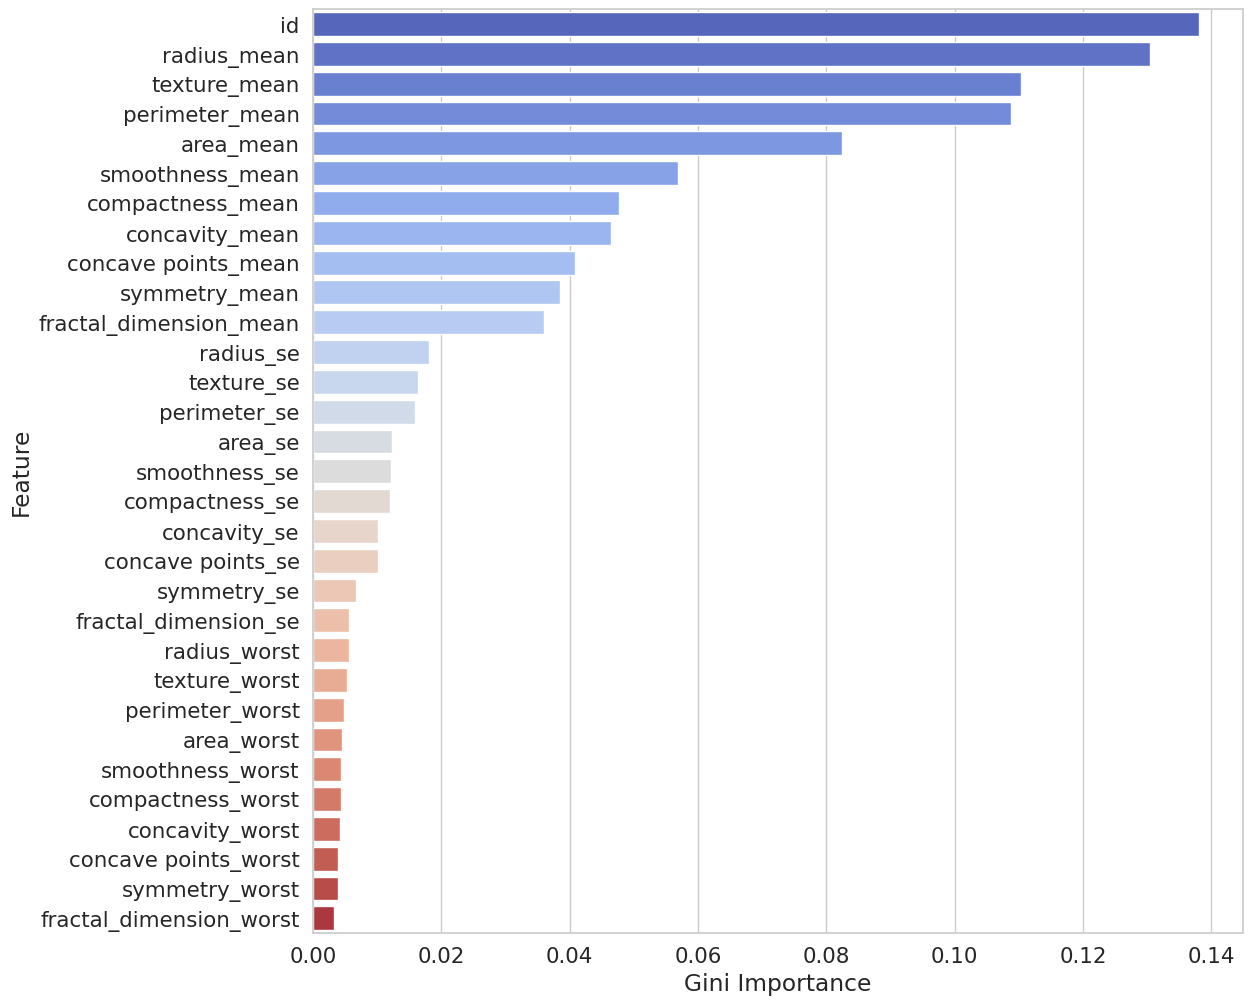

In [ ]:
feat_imp = pd.DataFrame({'Feature': list(X),
                        'Gini Importance': importance[indices]})

plt.rcParams['figure.figsize'] = (12,12)

sns.set_style('whitegrid')
ax = sns.barplot(x='Gini Importance', y='Feature', data=feat_imp, palette='coolwarm')
ax.set(xlabel='Gini Importance')
plt.show()

## Data Balancing[Over Sampling]

In [ ]:
df_norm.head()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis
0,-0.032403,0.182815,-0.301307,0.213053,0.146813,0.198968,0.531437,0.495081,0.487976,0.306758,...,-0.222474,0.385173,0.279792,0.196998,0.399079,0.351207,0.518192,0.335156,0.229268,M
1,-0.032403,0.304923,-0.051392,0.282848,0.284671,-0.104905,-0.078833,-0.004450,0.105621,0.000193,...,-0.060427,0.256680,0.264308,-0.056585,-0.065649,-0.024432,0.245339,-0.029717,0.033282,M
2,0.059177,0.263274,0.066295,0.262808,0.232497,0.119524,0.170416,0.254453,0.392549,0.129991,...,-0.003924,0.225304,0.203602,0.079452,0.165163,0.142341,0.441216,0.140399,0.023837,M
3,0.059229,-0.128132,0.036874,-0.099434,-0.114014,0.416536,0.550761,0.357546,0.279726,0.396657,...,0.021929,-0.041791,-0.076898,0.511335,0.593799,0.331239,0.491044,0.736693,0.584115,M
4,0.059241,0.291671,-0.167388,0.298051,0.272369,0.035567,0.087292,0.255859,0.275253,-0.001323,...,-0.240065,0.223810,0.170669,0.033226,-0.047797,0.102086,0.164583,-0.105806,-0.047001,M


In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
sm = SMOTE(random_state=42)

X_resOS, Y_resOS = sm.fit_resample(X_norm, Y_norm)

In [ ]:
Y_resOS.value_counts()

0    357
1    357
Name: count, dtype: int64



> ## SVC



In [ ]:
params = {
    'C': [0.1, 1, 100, 1000],
    'gamma': [0.0001, 0.001, 0.005, 0.1, 1, 3, 5]
}

model_name = 'SVC'
model_algo = SVC()
CV = 5

fitAndEvaluateModel(X_resOS, Y_resOS,
                    model_name,
                    model_algo,
                    params, CV)

Random seed set for reproducibility.

Splitting the data into training and testing sets...
Data split complete. Training set size: 571, Test set size: 143

Initializing GridSearchCV with the provided parameters...
GridSearchCV initialization complete.

Fitting the model using GridSearchCV...
Fitting 5 folds for each of 28 candidates, totalling 140 fits
Model fitting complete.

Best hyperparameters found:
{'C': 1, 'gamma': 1}

Predicting the test set results...
Prediction complete.

Calculating evaluation metrics...
Evaluation metrics calculation complete.

Saving the trained model to 'SVC'

Model saved successfully as 'SVC'

********** Evaluation Metrics **********
Accuracy: 0.9860

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        68
           1       0.97      1.00      0.99        75

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg



> ## Random Forest



In [ ]:
params = {
    'n_estimators': [100, 500, 1000, 2000]
}

model_name = 'RandomForest'
model_algo = RandomForestClassifier()
CV = 5

fitAndEvaluateModel(X_resOS, Y_resOS,
                    model_name,
                    model_algo,
                    params, CV)

Random seed set for reproducibility.

Splitting the data into training and testing sets...
Data split complete. Training set size: 571, Test set size: 143

Initializing GridSearchCV with the provided parameters...
GridSearchCV initialization complete.

Fitting the model using GridSearchCV...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Model fitting complete.

Best hyperparameters found:
{'n_estimators': 500}

Predicting the test set results...
Prediction complete.

Calculating evaluation metrics...
Evaluation metrics calculation complete.

Saving the trained model to 'RandomForest'

Model saved successfully as 'RandomForest'

********** Evaluation Metrics **********
Accuracy: 0.9860

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        68
           1       0.97      1.00      0.99        75

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99      



> ## XGBoost



In [ ]:
params = {
    'n_estimators': [100, 500, 1000, 2000]
}

model_name = 'XGBoost'
model_algo = XGBClassifier()
CV = 5

fitAndEvaluateModel(X_resOS, Y_resOS,
                    model_name,
                    model_algo,
                    params, CV)

Random seed set for reproducibility.

Splitting the data into training and testing sets...
Data split complete. Training set size: 571, Test set size: 143

Initializing GridSearchCV with the provided parameters...
GridSearchCV initialization complete.

Fitting the model using GridSearchCV...
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Model fitting complete.

Best hyperparameters found:
{'n_estimators': 100}

Predicting the test set results...
Prediction complete.

Calculating evaluation metrics...
Evaluation metrics calculation complete.

Saving the trained model to 'XGBoost'

Model saved successfully as 'XGBoost'

********** Evaluation Metrics **********
Accuracy: 0.9930

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        68
           1       0.99      1.00      0.99        75

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weigh

## Reloading the Saved Model

In [ ]:
load_model = pickle.load(open('XGBoost', 'rb'))

In [ ]:
pred1 = load_model.predict(X_test)

In [ ]:
pred1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1])

In [ ]:
load_model.best_params_

{'n_estimators': 100}

In [ ]:
load_model.best_score_

0.9702212051868802